Notebook para el trabajo de regresión logística utilizando datos de posibles riesgos de enfermedades cardíacas (infartos)
AREP - TDSE

In [1]:
%pip install numpy matplotlib 
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 26.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
np.random.seed(42)

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

In [18]:
import kagglehub
import shutil
import os
 
path = kagglehub.dataset_download("neurocipher/heartdisease")
os.mkdir("CSV")
destino = "CSV"
os.makedirs(destino, exist_ok=True)
 
for archivo in os.listdir(path):
    if archivo.endswith(".csv"):
        shutil.copy(
            os.path.join(path, archivo),
            os.path.join(destino, archivo)
        )
 
print("CSV copiados a:", os.path.abspath(destino))

c:\Users\ignac\OneDrive\Documentos\Universidad\TDSE\Tarea-2_TDSE\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


FileExistsError: [WinError 183] No se puede crear un archivo que ya existe: 'CSV'

## Paso 1: Importar el CSV y cambiar los datos de la columna "Heart Disease" por valores numéricos (Presence por 1; Absence por 0).


In [3]:
import pandas as pd
data = pd.read_csv("CSV/Heart_Disease_Prediction.csv")
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                        0   

In [4]:

data['Heart Disease'] = data['Heart Disease'].str.strip().str.lower()

data['Heart Disease'] = data['Heart Disease'].replace({
    'presence': 1,
    'absence': 0
})

print(data['Heart Disease'].value_counts())

Heart Disease
0    150
1    120
Name: count, dtype: int64


In [5]:
data['Heart Disease'] = data['Heart Disease'].replace({
    'Presence': 1,
    'Absence': 0
})
print(data.head())

   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium  Heart Disease  
0                        3         3              1  
1                        0         7              0  
2                        0

## Paso 2: EDA
La variable Y corresponde a los valores de la columna "Heart Disease".


In [8]:

import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display


def table_and_bar_numeric(column, bins=5):
    tabla = data[column].value_counts(bins=bins).sort_index()
    
    # Mostrar tabla
    tabla_df = tabla.reset_index()
    tabla_df.columns = ["Rango", "Frecuencia"]
    display(tabla_df)
    
    # Gráfico
    plt.figure()
    tabla.plot(kind="bar")
    plt.title(f"Distribución de {column}")
    plt.xlabel("Rangos")
    plt.ylabel("Frecuencia")
    plt.show()




,Rango,Frecuencia
0,"(28.951, 38.6]",9
1,"(38.6, 48.2]",65
2,"(48.2, 57.8]",85
3,"(57.8, 67.4]",95
4,"(67.4, 77.0]",16


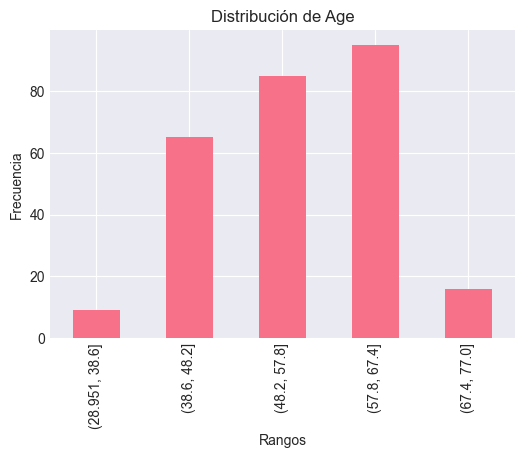

,Rango,Frecuencia
0,"(125.56099999999999, 213.6]",69
1,"(213.6, 301.2]",160
2,"(301.2, 388.8]",36
3,"(388.8, 476.4]",4
4,"(476.4, 564.0]",1


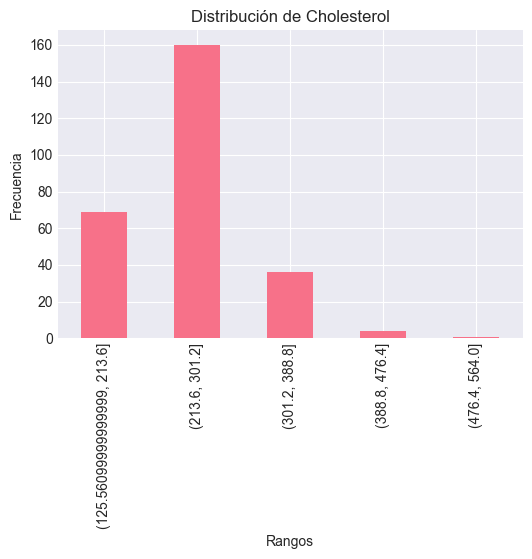

,Rango,Frecuencia
0,"(93.893, 115.2]",49
1,"(115.2, 136.4]",124
2,"(136.4, 157.6]",73
3,"(157.6, 178.8]",19
4,"(178.8, 200.0]",5


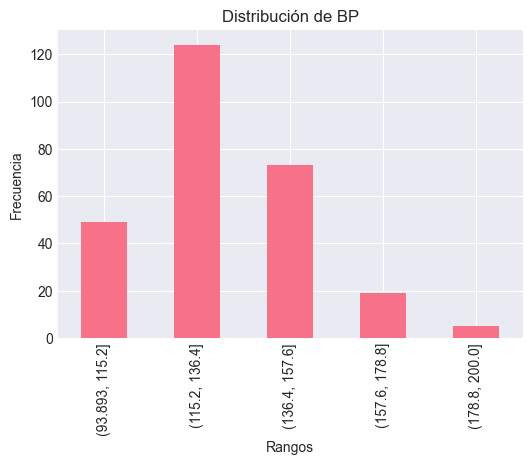

,Rango,Frecuencia
0,"(70.868, 97.2]",6
1,"(97.2, 123.4]",34
2,"(123.4, 149.6]",76
3,"(149.6, 175.8]",125
4,"(175.8, 202.0]",29


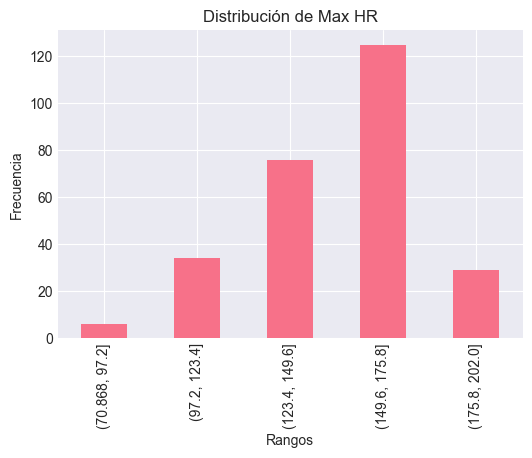

,Rango,Frecuencia
0,"(-0.0072, 1.24]",173
1,"(1.24, 2.48]",63
2,"(2.48, 3.72]",27
3,"(3.72, 4.96]",5
4,"(4.96, 6.2]",2


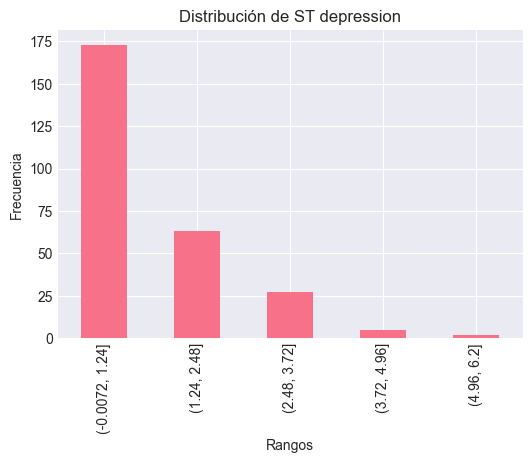

In [9]:
columns = [
    "Age",
    "Cholesterol",
    "BP",
    "Max HR",
    "ST depression"
]

for col in columns:
    table_and_bar_numeric(col)

In [10]:


# Seleccionar features (≥6)
selected_features = [
    'Age', 'Cholesterol', 'BP', 'Max HR', 
    'ST depression', 'Number of vessels fluro',
    'Chest pain type', 'Thallium'
]

X = data[selected_features].values
y = data['Heart Disease'].values
print(f"X: {X.shape}, y: {y.shape}")

X: (270, 8), y: (270,)


In [11]:
def train_test_split_stratified(X, y, test_size=0.3, random_state=42):
    np.random.seed(random_state)
    indices_0 = np.where(y == 0)[0]
    indices_1 = np.where(y == 1)[0]
    np.random.shuffle(indices_0)
    np.random.shuffle(indices_1)
    split_0 = int(len(indices_0) * (1 - test_size))
    split_1 = int(len(indices_1) * (1 - test_size))
    train_idx = np.concatenate([indices_0[:split_0], indices_1[:split_1]])
    test_idx = np.concatenate([indices_0[split_0:], indices_1[split_1:]])
    np.random.shuffle(train_idx)
    np.random.shuffle(test_idx)
    return X[train_idx], X[test_idx], y[train_idx], y[test_idx]

X_train, X_test, y_train, y_test = train_test_split_stratified(X, y, 0.30, 42)
print(f"Train: {len(X_train)}, Test: {len(X_test)}")

Train: 189, Test: 81


In [12]:
def normalize(X_train, X_test):
    mean = np.mean(X_train, axis=0)
    std = np.std(X_train, axis=0)
    std[std == 0] = 1
    return (X_train - mean) / std, (X_test - mean) / std, mean, std

X_train_norm, X_test_norm, feat_mean, feat_std = normalize(X_train, X_test)
print("Normalización completada")

Normalización completada


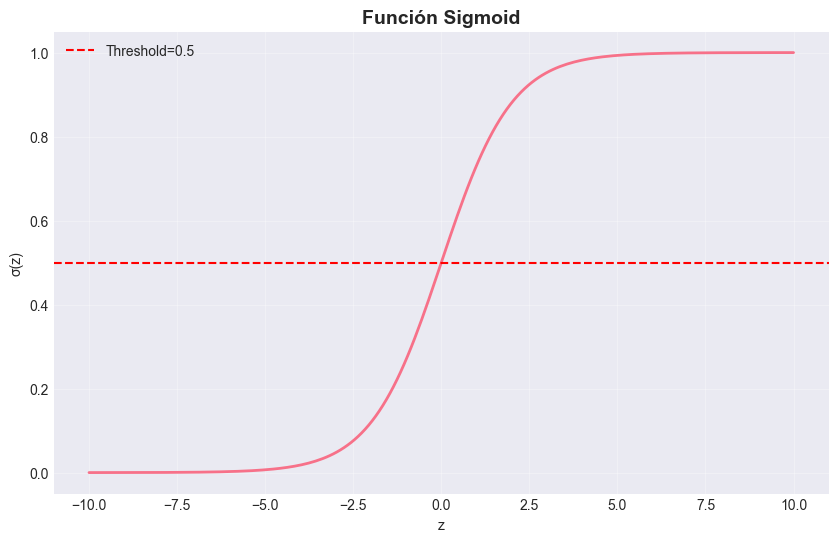

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Visualizar
z_vals = np.linspace(-10, 10, 200)
plt.figure(figsize=(10, 6))
plt.plot(z_vals, sigmoid(z_vals), linewidth=2)
plt.title("Función Sigmoid", fontsize=14, fontweight='bold')
plt.xlabel("z")
plt.ylabel("σ(z)")
plt.axhline(0.5, color='red', linestyle='--', label='Threshold=0.5')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [14]:
def compute_cost(w, b, X, y):
    m = X.shape[0]
    z = X @ w + b
    f = sigmoid(z)
    eps = 1e-8
    f_clip = np.clip(f, eps, 1 - eps)
    J = -(1/m) * np.sum(y*np.log(f_clip) + (1-y)*np.log(1-f_clip))
    return J


In [15]:
def compute_gradient(w, b, X, y):
    m = X.shape[0]
    z = X @ w + b
    f = sigmoid(z)
    error = f - y
    dj_dw = (1/m) * (X.T @ error)
    dj_db = (1/m) * np.sum(error)
    return dj_dw, dj_db

In [16]:
def gradient_descent(X, y, w_init, b_init, alpha, num_iters, print_every=100):
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, X, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost(w, b, X, y)
        J_history.append(J)
        
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iter {i:4d}: Cost = {J:.6f}")
    
    return w, b, J_history



In [17]:
n_features = X_train_norm.shape[1]
w_init = np.zeros(n_features)
b_init = 0.0
alpha = 0.01
num_iters = 1500

print("Entrenando modelo...")
print("="*60)
w_final, b_final, J_history = gradient_descent(
    X_train_norm, y_train, w_init, b_init, alpha, num_iters, print_every=250
)
print("="*60)
print(f"\nCosto inicial: {J_history[0]:.6f}")
print(f"Costo final:    {J_history[-1]:.6f}")
print(f"Bias (b): {b_final:.6f}")

Entrenando modelo...
Iter    0: Cost = 0.690608
Iter  250: Cost = 0.458731
Iter  500: Cost = 0.418085
Iter  750: Cost = 0.403660
Iter 1000: Cost = 0.396851
Iter 1250: Cost = 0.393089
Iter 1499: Cost = 0.390799

Costo inicial: 0.690608
Costo final:    0.390799
Bias (b): -0.205146


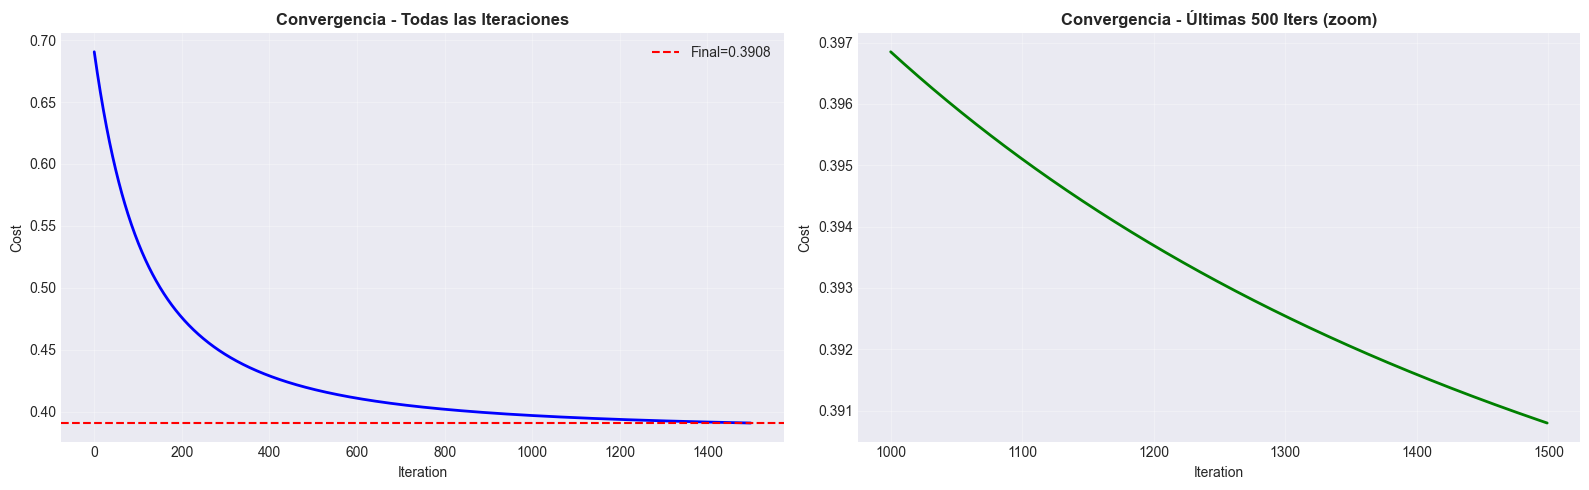


Cambio en últimas 100 iters: 0.00078980


In [19]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(J_history, linewidth=2, color='blue')
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Cost')
axes[0].set_title('Convergencia - Todas las Iteraciones', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(J_history[-1], color='red', linestyle='--', label=f'Final={J_history[-1]:.4f}')
axes[0].legend()

axes[1].plot(range(len(J_history)-500, len(J_history)), J_history[-500:], linewidth=2, color='green')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Cost')
axes[1].set_title('Convergencia - Últimas 500 Iters (zoom)', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nCambio en últimas 100 iters: {J_history[-100] - J_history[-1]:.8f}")
if abs(J_history[-100] - J_history[-1]) < 1e-5:
    print("Modelo convergido")

In [20]:
def predict(w, b, X, threshold=0.5):
    z = X @ w + b
    proba = sigmoid(z)
    preds = (proba >= threshold).astype(int)
    return preds, proba

def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    
    acc = (tp + tn) / (tp + tn + fp + fn)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    rec = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (prec * rec) / (prec + rec) if (prec + rec) > 0 else 0
    
    return acc, prec, rec, f1

y_train_pred, _ = predict(w_final, b_final, X_train_norm)
y_test_pred, _ = predict(w_final, b_final, X_test_norm)

train_acc, train_prec, train_rec, train_f1 = calculate_metrics(y_train, y_train_pred)
test_acc, test_prec, test_rec, test_f1 = calculate_metrics(y_test, y_test_pred)

print("="*70)
print("MÉTRICAS")
print("="*70)
print(f"{'Métrica':<15} {'Train':>12} {'Test':>12}")
print("-" * 70)
print(f"{'Accuracy':<15} {train_acc:>12.4f} {test_acc:>12.4f}")
print(f"{'Precision':<15} {train_prec:>12.4f} {test_prec:>12.4f}")
print(f"{'Recall':<15} {train_rec:>12.4f} {test_rec:>12.4f}")
print(f"{'F1-Score':<15} {train_f1:>12.4f} {test_f1:>12.4f}")
print("="*70)

MÉTRICAS
Métrica                Train         Test
----------------------------------------------------------------------
Accuracy              0.8254       0.8765
Precision             0.8312       0.8250
Recall                0.7619       0.9167
F1-Score              0.7950       0.8684



Coeficientes (ordenados por magnitud):
                Feature  Coefficient
Number of vessels fluro     0.821003
               Thallium     0.771998
        Chest pain type     0.624170
          ST depression     0.531857
                 Max HR    -0.456594
                     BP     0.162698
                    Age    -0.103126
            Cholesterol     0.093702


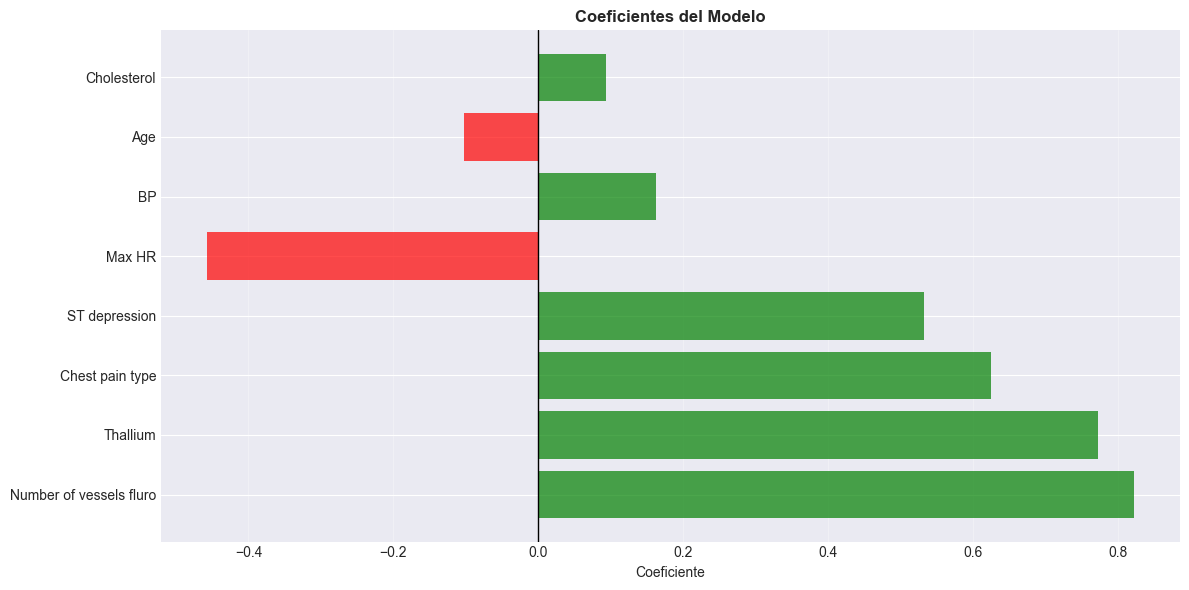

In [21]:
coef_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': w_final
}).sort_values('Coefficient', key=abs, ascending=False)

print("\nCoeficientes (ordenados por magnitud):")
print(coef_df.to_string(index=False))

plt.figure(figsize=(12, 6))
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color=colors, alpha=0.7)
plt.xlabel('Coeficiente')
plt.title('Coeficientes del Modelo', fontweight='bold')
plt.axvline(0, color='black', linewidth=1)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

In [22]:
def train_2d_model(X_2d, y, alpha=0.01, num_iters=1500):
    mean = np.mean(X_2d, axis=0)
    std = np.std(X_2d, axis=0)
    std[std == 0] = 1
    X_norm = (X_2d - mean) / std
    w_init = np.zeros(2)
    b_init = 0.0
    w, b, J_hist = gradient_descent(X_norm, y, w_init, b_init, alpha, num_iters, 0)
    return w, b, mean, std, J_hist

print("Función 2D lista")

Función 2D lista


In [23]:
def plot_boundary_2d(X, y, w, b, mean, std, feat_names, ax=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 8))
    
    class_0 = y == 0
    class_1 = y == 1
    ax.scatter(X[class_0, 0], X[class_0, 1], c='blue', marker='o', s=80, alpha=0.6, 
               edgecolors='k', label='Absence (0)')
    ax.scatter(X[class_1, 0], X[class_1, 1], c='red', marker='s', s=80, alpha=0.6, 
               edgecolors='k', label='Presence (1)')
    
    x1_min, x1_max = X[:, 0].min()-1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max, 300),
                            np.linspace(x2_min, x2_max, 300))
    X_grid = np.c_[xx1.ravel(), xx2.ravel()]
    X_grid_norm = (X_grid - mean) / std
    z = X_grid_norm @ w + b
    proba = sigmoid(z).reshape(xx1.shape)
    
    ax.contour(xx1, xx2, proba, levels=[0.5], colors='black', linewidths=2.5)
    ax.contourf(xx1, xx2, proba, levels=20, cmap='RdBu_r', alpha=0.3)
    ax.set_xlabel(feat_names[0], fontsize=12, fontweight='bold')
    ax.set_ylabel(feat_names[1], fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(True, alpha=0.3)
    return ax

print("Función de plot lista")

Función de plot lista


Entrenando: Age vs Cholesterol
Costo final: 0.672006


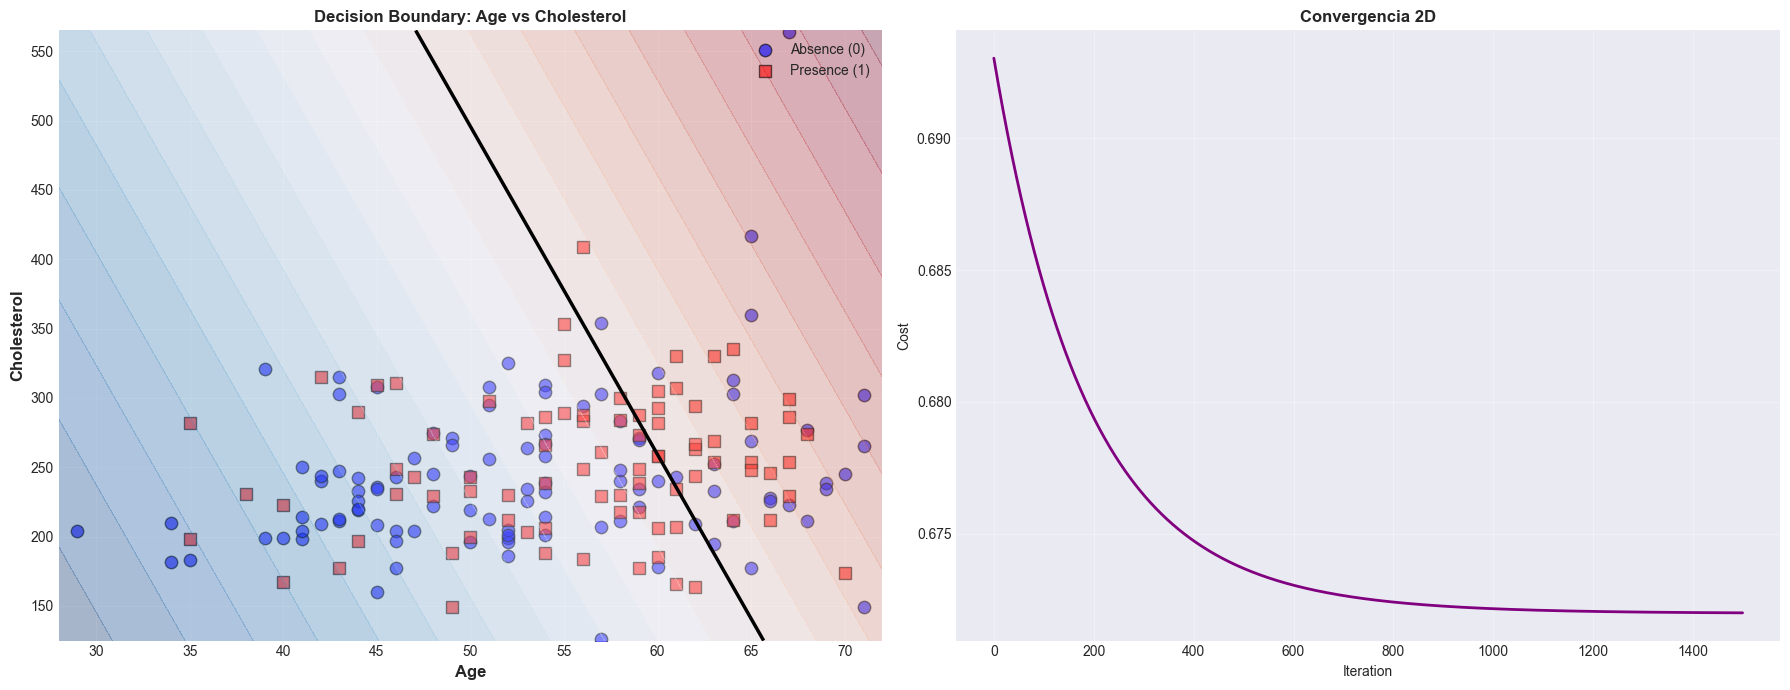


Insight: La boundary separa las clases en base a Age y Cholesterol.


In [24]:
pair1 = ['Age', 'Cholesterol']
idx1 = [selected_features.index(f) for f in pair1]
X_pair1 = X_train[:, idx1]

print(f"Entrenando: {pair1[0]} vs {pair1[1]}")
w1, b1, mean1, std1, J_hist1 = train_2d_model(X_pair1, y_train)
print(f"Costo final: {J_hist1[-1]:.6f}")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plot_boundary_2d(X_pair1, y_train, w1, b1, mean1, std1, pair1, ax=axes[0])
axes[0].set_title(f'Decision Boundary: {pair1[0]} vs {pair1[1]}', fontweight='bold')

axes[1].plot(J_hist1, linewidth=2, color='purple')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Cost')
axes[1].set_title('Convergencia 2D', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: La boundary separa las clases en base a Age y Cholesterol.")

Entrenando: BP vs Max HR
Costo final: 0.587574


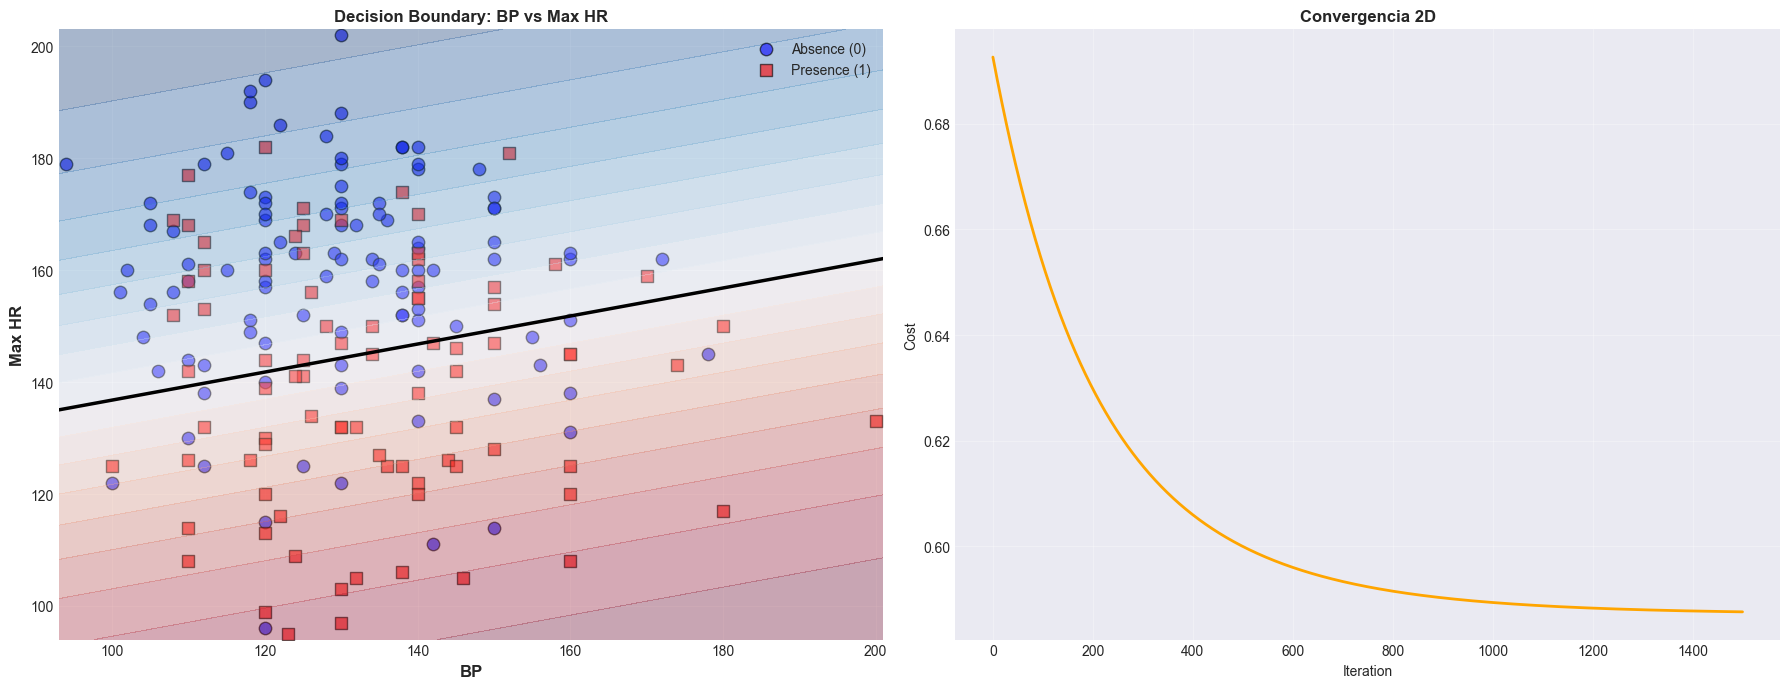


Insight: BP y Max HR muestran separación moderada de clases.


In [25]:
pair2 = ['BP', 'Max HR']
idx2 = [selected_features.index(f) for f in pair2]
X_pair2 = X_train[:, idx2]

print(f"Entrenando: {pair2[0]} vs {pair2[1]}")
w2, b2, mean2, std2, J_hist2 = train_2d_model(X_pair2, y_train)
print(f"Costo final: {J_hist2[-1]:.6f}")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plot_boundary_2d(X_pair2, y_train, w2, b2, mean2, std2, pair2, ax=axes[0])
axes[0].set_title(f'Decision Boundary: {pair2[0]} vs {pair2[1]}', fontweight='bold')

axes[1].plot(J_hist2, linewidth=2, color='orange')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Cost')
axes[1].set_title('Convergencia 2D', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: BP y Max HR muestran separación moderada de clases.")

Entrenando: ST depression vs Number of vessels fluro
Costo final: 0.515726


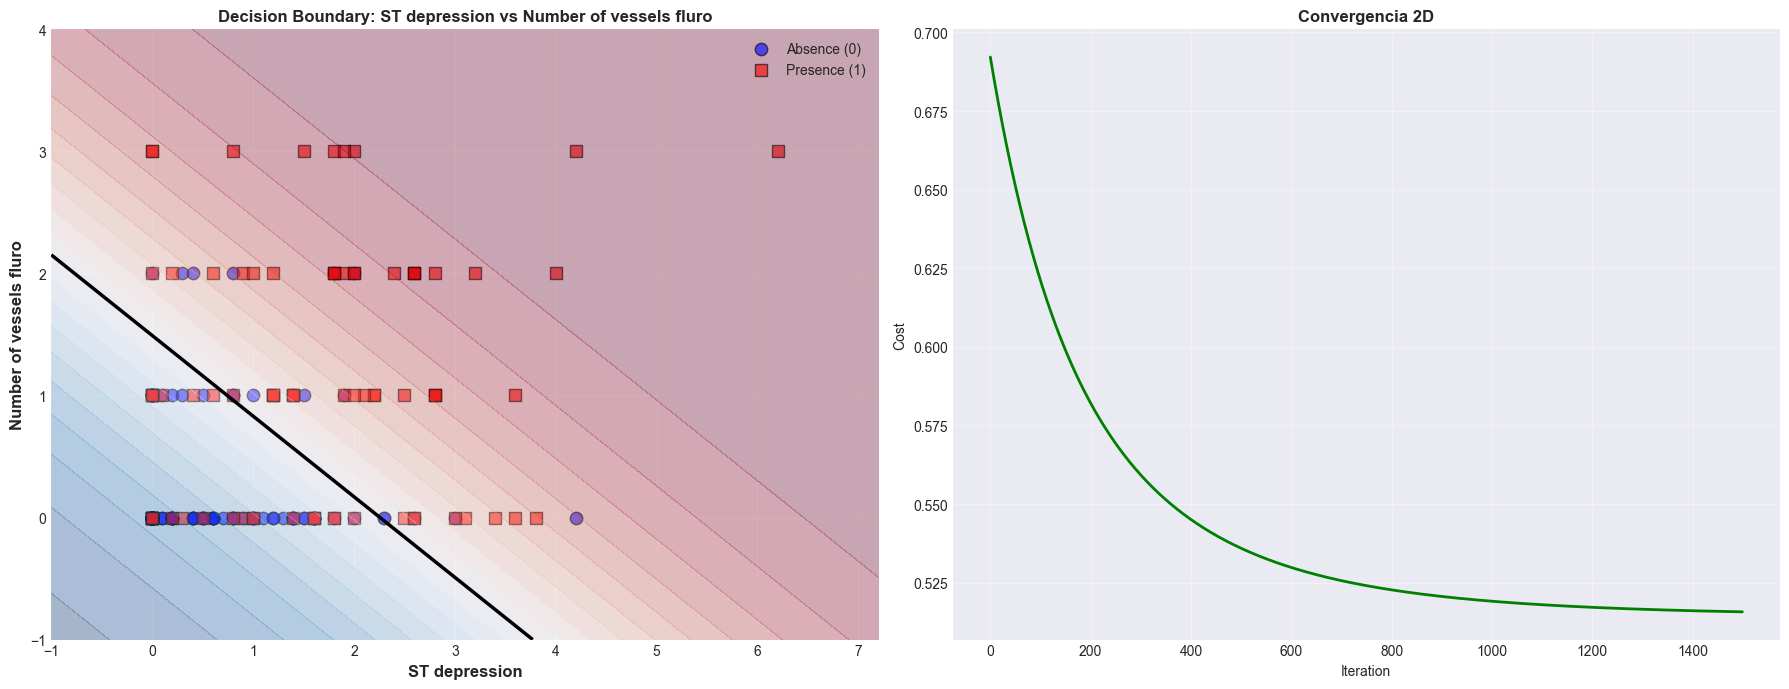


Insight: Indicadores clínicos importantes con buena separabilidad.


In [26]:
pair3 = ['ST depression', 'Number of vessels fluro']
idx3 = [selected_features.index(f) for f in pair3]
X_pair3 = X_train[:, idx3]

print(f"Entrenando: {pair3[0]} vs {pair3[1]}")
w3, b3, mean3, std3, J_hist3 = train_2d_model(X_pair3, y_train)
print(f"Costo final: {J_hist3[-1]:.6f}")

fig, axes = plt.subplots(1, 2, figsize=(18, 7))
plot_boundary_2d(X_pair3, y_train, w3, b3, mean3, std3, pair3, ax=axes[0])
axes[0].set_title(f'Decision Boundary: {pair3[0]} vs {pair3[1]}', fontweight='bold')

axes[1].plot(J_hist3, linewidth=2, color='green')
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Cost')
axes[1].set_title('Convergencia 2D', fontweight='bold')
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nInsight: Indicadores clínicos importantes con buena separabilidad.")

In [27]:
def compute_cost_reg(w, b, X, y, lambda_):
    J = compute_cost(w, b, X, y)
    m = X.shape[0]
    reg_term = (lambda_ / (2*m)) * np.sum(w**2)
    return J + reg_term

def compute_gradient_reg(w, b, X, y, lambda_):
    dj_dw, dj_db = compute_gradient(w, b, X, y)
    m = X.shape[0]
    dj_dw_reg = dj_dw + (lambda_/m) * w
    return dj_dw_reg, dj_db

def gradient_descent_reg(X, y, w_init, b_init, alpha, lambda_, num_iters, print_every=0):
    w = w_init.copy()
    b = b_init
    J_history = []
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_reg(w, b, X, y, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J = compute_cost_reg(w, b, X, y, lambda_)
        J_history.append(J)
        
        if print_every > 0 and (i % print_every == 0 or i == num_iters - 1):
            print(f"Iter {i:4d}: Cost = {J:.6f}, ||w|| = {np.linalg.norm(w):.6f}")
    
    return w, b, J_history

print("Regularización L2 implementada")

Regularización L2 implementada


In [28]:
lambda_vals = [0, 0.001, 0.01, 0.1, 1.0]
results_reg = []

print("Entrenando con diferentes λ...")
for lambda_ in lambda_vals:
    print(f"\nλ = {lambda_}")
    w_init = np.zeros(n_features)
    b_init = 0.0
    w_reg, b_reg, J_hist_reg = gradient_descent_reg(
        X_train_norm, y_train, w_init, b_init, 0.01, lambda_, 1500, 500
    )
    
    y_test_pred_reg, _ = predict(w_reg, b_reg, X_test_norm)
    test_acc_reg, test_prec_reg, test_rec_reg, test_f1_reg = calculate_metrics(y_test, y_test_pred_reg)
    
    results_reg.append({
        'lambda': lambda_,
        'w_norm': np.linalg.norm(w_reg),
        'test_acc': test_acc_reg,
        'test_f1': test_f1_reg
    })

print("\nEntrenamiento completado")

Entrenando con diferentes λ...

λ = 0
Iter    0: Cost = 0.690608, ||w|| = 0.005016
Iter  500: Cost = 0.418085, ||w|| = 1.027125
Iter 1000: Cost = 0.396851, ||w|| = 1.327454
Iter 1499: Cost = 0.390799, ||w|| = 1.482178

λ = 0.001
Iter    0: Cost = 0.690608, ||w|| = 0.005016
Iter  500: Cost = 0.418089, ||w|| = 1.027114
Iter 1000: Cost = 0.396857, ||w|| = 1.327427
Iter 1499: Cost = 0.390805, ||w|| = 1.482135

λ = 0.01
Iter    0: Cost = 0.690608, ||w|| = 0.005016
Iter  500: Cost = 0.418123, ||w|| = 1.027013
Iter 1000: Cost = 0.396909, ||w|| = 1.327185
Iter 1499: Cost = 0.390867, ||w|| = 1.481755

λ = 0.1
Iter    0: Cost = 0.690608, ||w|| = 0.005016
Iter  500: Cost = 0.418465, ||w|| = 1.026009
Iter 1000: Cost = 0.397430, ||w|| = 1.324768
Iter 1499: Cost = 0.391485, ||w|| = 1.477961

λ = 1.0
Iter    0: Cost = 0.690608, ||w|| = 0.005016
Iter  500: Cost = 0.421832, ||w|| = 1.016057
Iter 1000: Cost = 0.402494, ||w|| = 1.301083
Iter 1499: Cost = 0.397437, ||w|| = 1.441191

Entrenamiento completa

In [31]:
print("="*60)
print("MÉTRICAS POR λ")
print("="*60)
print(f"{'λ':<10} {'||w||':<12} {'Test Acc':<12} {'Test F1':<12}")
print("-"*60)
for r in results_reg:
    print(f"{r['lambda']:<10} {r['w_norm']:<12.4f} {r['test_acc']:<12.4f} {r['test_f1']:<12.4f}")
print("="*60)

best = max(results_reg, key=lambda x: x['test_f1'])
unreg = results_reg[0]
improvement = (best['test_f1'] - unreg['test_f1']) / unreg['test_f1'] * 100

print(f"\nMejor λ: {best['lambda']}")
print(f"Test F1: {best['test_f1']:.4f}")
print(f"Mejora: {improvement:+.2f}%")

MÉTRICAS POR λ
λ          ||w||        Test Acc     Test F1     
------------------------------------------------------------
0          1.4822       0.8765       0.8684      
0.001      1.4821       0.8765       0.8684      
0.01       1.4818       0.8765       0.8684      
0.1        1.4780       0.8765       0.8684      
1.0        1.4412       0.8765       0.8684      

Mejor λ: 0
Test F1: 0.8684
Mejora: +0.00%


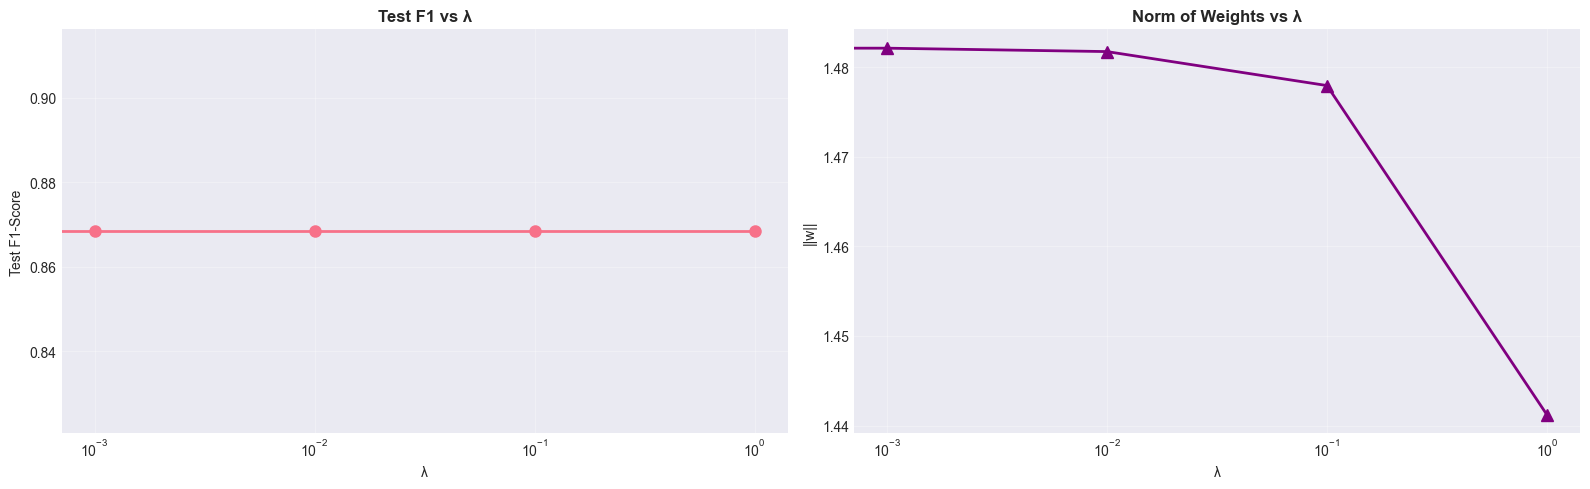

In [32]:
lambdas = [r['lambda'] for r in results_reg]
test_f1s = [r['test_f1'] for r in results_reg]
w_norms = [r['w_norm'] for r in results_reg]

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].plot(lambdas, test_f1s, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('λ')
axes[0].set_ylabel('Test F1-Score')
axes[0].set_title('Test F1 vs λ', fontweight='bold')
axes[0].set_xscale('log')
axes[0].grid(True, alpha=0.3)
axes[0].axvline(best['lambda'], color='red', linestyle='--', alpha=0.7)

axes[1].plot(lambdas, w_norms, marker='^', linewidth=2, markersize=8, color='purple')
axes[1].set_xlabel('λ')
axes[1].set_ylabel('||w||')
axes[1].set_title('Norm of Weights vs λ', fontweight='bold')
axes[1].set_xscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [34]:
print("="*70)
print("RESUMEN FINAL")
print("="*70)
print(f"\n1. DATASET: {len(data)} muestras, {len(selected_features)} features")
print(f"2. MODELO BASE (λ=0):")
print(f"   • Test Accuracy: {test_acc:.4f}")
print(f"   • Test F1: {test_f1:.4f}")
print(f"3. MEJOR MODELO (λ={best['lambda']}):")
print(f"   • Test F1: {best['test_f1']:.4f}")
print(f"   • Mejora: {improvement:+.2f}%")
print(f"4. DECISION BOUNDARIES: 3 pares analizados")
print("="*70)
print("\n✓ Implementación completa desde cero")
print("✓ Todos los pasos (2, 3, 4) completados")

RESUMEN FINAL

1. DATASET: 270 muestras, 8 features
2. MODELO BASE (λ=0):
   • Test Accuracy: 0.8765
   • Test F1: 0.8684
3. MEJOR MODELO (λ=0):
   • Test F1: 0.8684
   • Mejora: +0.00%
4. DECISION BOUNDARIES: 3 pares analizados

✓ Implementación completa desde cero
✓ Todos los pasos (2, 3, 4) completados
